## HEART DISEASE

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'framingham.csv', 'heart.csv(1)', 'Heart_Disease_Prediction(Final(2)).ipynb', 'heart_disease_prediction(Final).ipynb']


### LOAD DATASET

In [2]:
df = pd.read_csv("heart.csv(1)")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
df.shape

(303, 14)

#### Printing out a few columns

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking correlation between columns

In [10]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [11]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
df["target"].unique()

array([1, 0], dtype=int64)

In [13]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## EXPLORATORY DATA ANALYSIS (EDA)

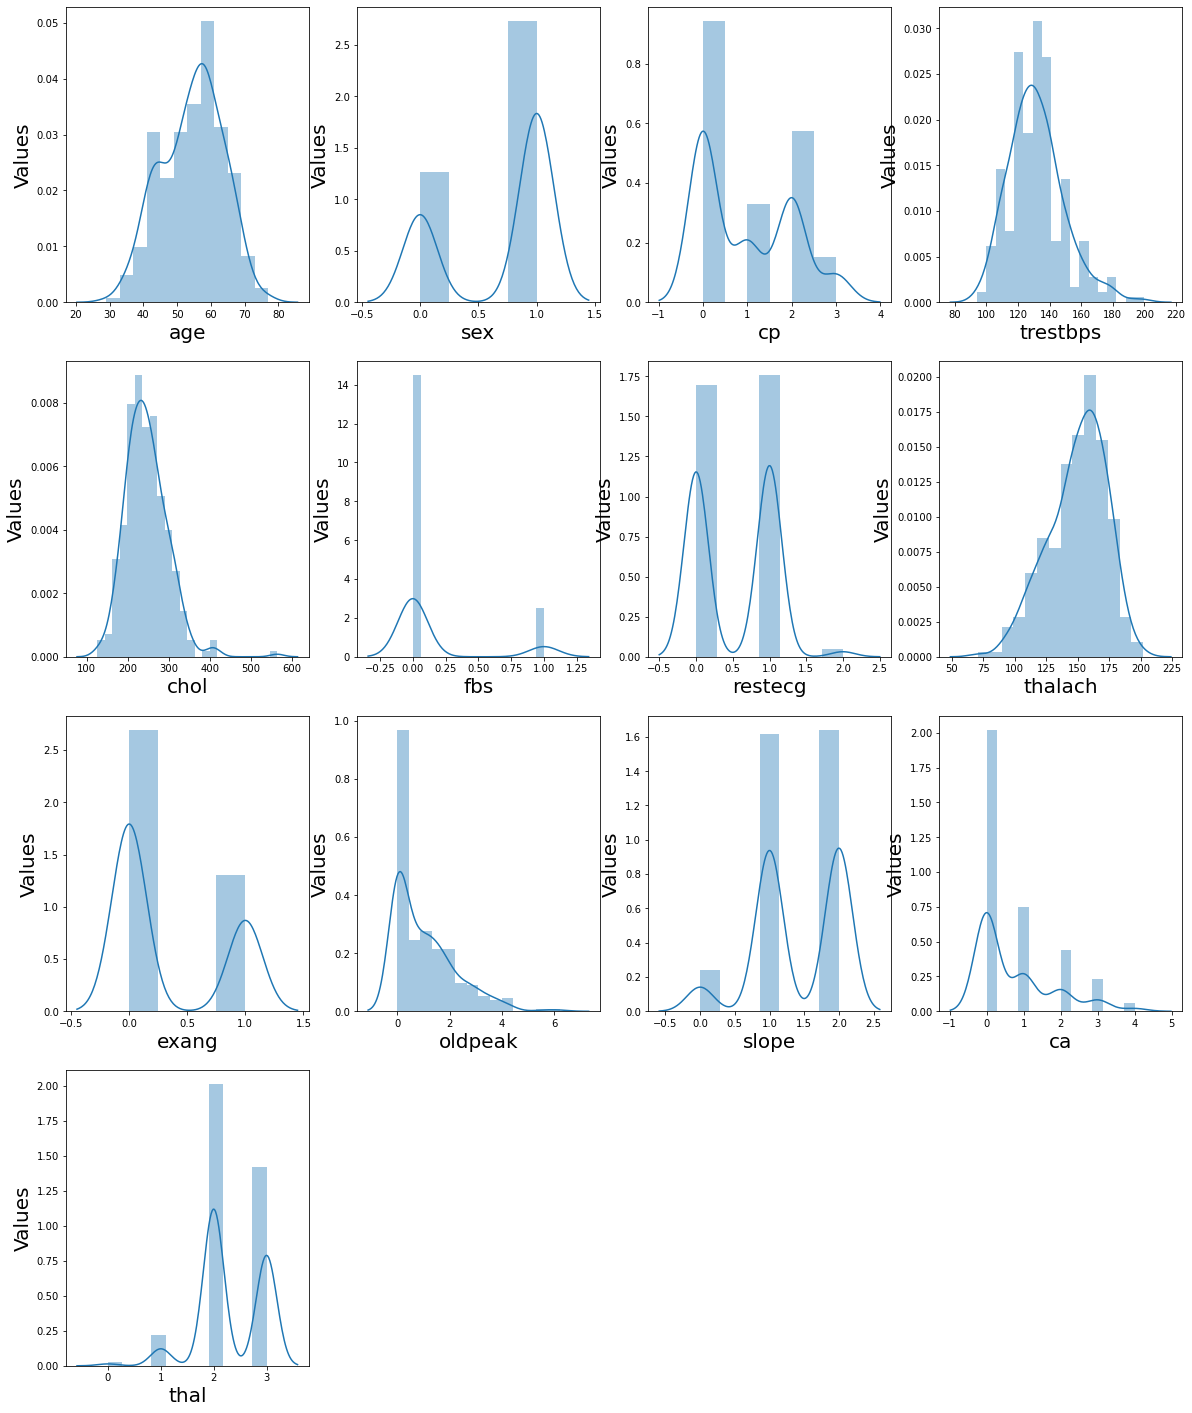

In [14]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

1    165
0    138
Name: target, dtype: int64


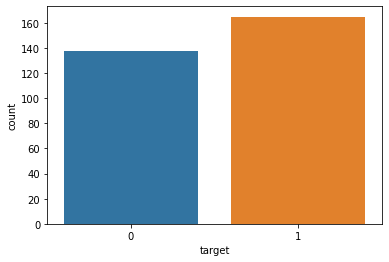

In [15]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
df["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

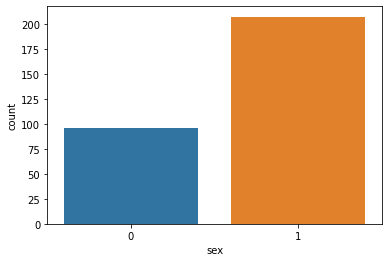

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "sex" is a categorical column in your DataFrame
sns.countplot(x="sex", data=df)

# Display the plot
plt.show()


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

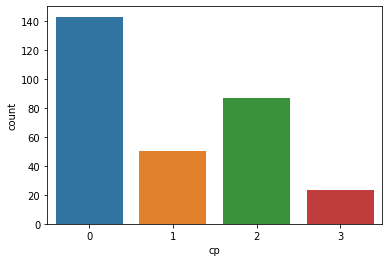

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "cp" is a categorical column in your DataFrame
sns.countplot(x="cp", data=df)

# Display the plot
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
df["fbs"].unique()

array([1, 0], dtype=int64)

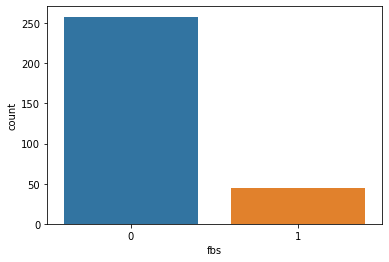

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "fbs" is a binary categorical column in your DataFrame
sns.countplot(x="fbs", data=df)

# Display the plot
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
df["restecg"].unique()

array([0, 1, 2], dtype=int64)

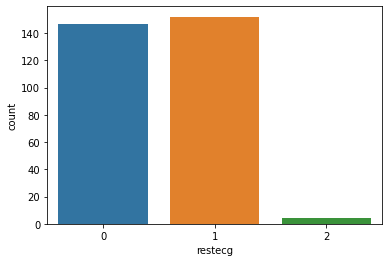

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "restecg" is a categorical column in your DataFrame
sns.countplot(x="restecg", data=df)

# Display the plot
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
df["exang"].unique()

array([0, 1], dtype=int64)

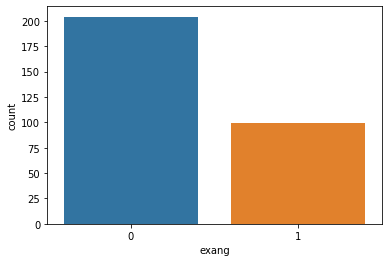

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "exang" is a binary categorical column in your DataFrame
sns.countplot(x="exang", data=df)

# Display the plot
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
df["slope"].unique()

array([0, 2, 1], dtype=int64)

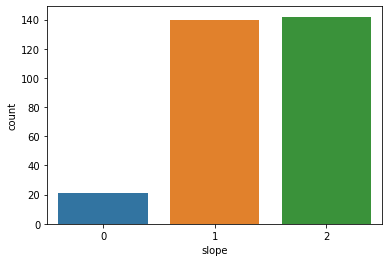

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "slope" is a categorical column in your DataFrame
sns.countplot(x="slope", data=df)

# Display the plot
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

#### number of major vessels (0-3) colored by flourosopy

In [30]:
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

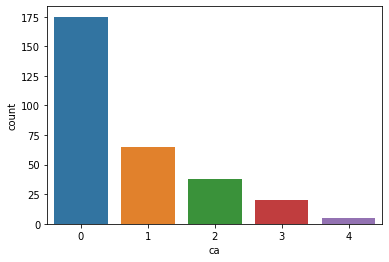

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "ca" is a categorical column in your DataFrame
sns.countplot(x="ca", data=df)

# Display the plot
plt.show()

##### ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [32]:
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

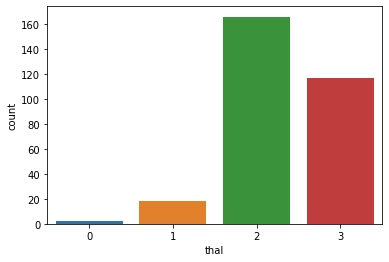

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "thal" is a categorical column in your DataFrame
sns.countplot(x="thal", data=df)

# Display the plot
plt.show()

## Train Test split

In [34]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [35]:
X_train.shape

(242, 13)

In [36]:
X_test.shape

(61, 13)

In [37]:
Y_train.shape

(242,)

In [38]:
Y_test.shape

(61,)

## Model Fitting

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### LOGISTIC REGRESSION(LR)

In [40]:
from sklearn. linear_model import LogisticRegression
logreg = LogisticRegression()
logreg. fit(X_train, Y_train)

LogisticRegression()

In [41]:
Y_train_pred = logreg. predict (X_train)
Y_test_pred = logreg. predict (X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print ("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report (Y_test, Y_test_pred))
print ("Confusion Matrix: \n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.8388429752066116
Test Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix: 
 [[22  5]
 [ 4 30]]


### NAIVE BAYES(NB)

In [42]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [43]:
Y_train_pred = naive_bayes_classifier.predict(X_train)
Y_test_pred = naive_bayes_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.8347107438016529
Test Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[21  6]
 [ 3 31]]


### K-NEAREST NEIGHBOR(KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
Y_train_pred = knn_classifier.predict(X_train)
Y_test_pred = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.731404958677686
Test Accuracy: 0.6721311475409836
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63        27
           1       0.71      0.71      0.71        34

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61

Confusion Matrix:
 [[17 10]
 [10 24]]


### DECISION TREE(DT)

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
Y_train_pred = decision_tree_classifier.predict(X_train)
Y_test_pred = decision_tree_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Confusion Matrix:
 [[22  5]
 [ 8 26]]


### RANDOM FOREST(RF)

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [49]:
Y_train_pred = random_forest_classifier.predict(X_train)
Y_test_pred = random_forest_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[22  5]
 [ 4 30]]


### GRADIENT BOOSTING MACHINES(GBM)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [51]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbm_classifier.fit(X_train, Y_train)

Y_train_pred = gbm_classifier.predict(X_train)
Y_test_pred = gbm_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix:
 [[21  6]
 [ 6 28]]


### XG BOOST(EXTREME GRADIENT BOOSTING)

In [52]:
!pip install xgboost

In [53]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(verbosity=0)
xgbc.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
Y_train_pred = xgbc.predict(X_train)
Y_test_pred = xgbc.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[22  5]
 [ 5 29]]


### ADABOOST(ADAPTIVE BOOSTING)

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [56]:
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, Y_train)

Y_train_pred = adaboost_classifier.predict(X_train)
Y_test_pred = adaboost_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.9214876033057852
Test Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[25  2]
 [ 4 30]]


### SUPPORT VECTOR MACHINE(SVM)

In [57]:
pip install scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.svm import SVC

In [59]:
svm_classifier = SVC(kernel="linear")

svm_classifier.fit(X_train, Y_train)

Y_train_pred = svm_classifier.predict(X_train)
Y_test_pred = svm_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report (Test Set):\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(Y_test, Y_test_pred))

Train Accuracy: 0.8471074380165289
Test Accuracy: 0.819672131147541
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix (Test Set):
 [[20  7]
 [ 4 30]]


### TABLE

In [60]:
import pandas as pd

# Create a dictionary with algorithm names and corresponding metric values
data = {
    'Algorithm': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decison Tree', 'Random Forest', 'GBM','Xg Boost', 'ADABoost','SVM'],
    'Test Accuracy': [0.85,0.85,0.67,0.78,0.85,0.80,0.83,0.90,0.81],
    'Train accuracy': [0.83,0.83,0.73,1.00,1.00,1.00,1.00,0.92,0.84],
}


# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df

,Algorithm,Test Accuracy,Train accuracy
0,Logistic Regression,0.85,0.83
1,Naive Bayes,0.85,0.83
2,KNN,0.67,0.73
3,Decison Tree,0.78,1.00
4,Random Forest,0.85,1.00
5,GBM,0.80,1.00
6,Xg Boost,0.83,1.00
7,ADABoost,0.90,0.92
8,SVM,0.81,0.84


### PRINCIPAL COMPONENT ANALYSIS(PCA)

In [61]:
pip install scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


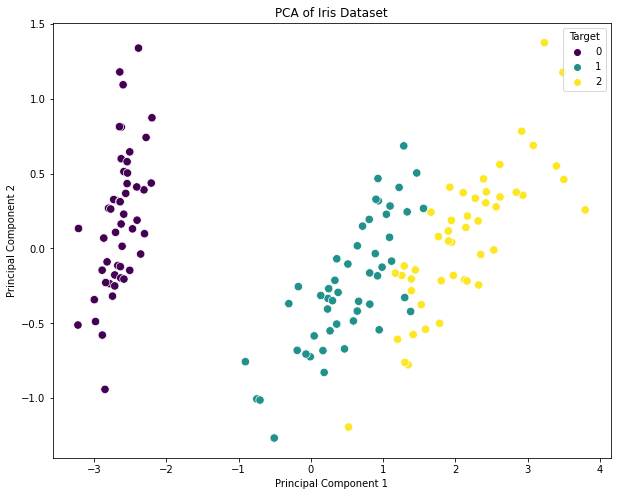

In [62]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset for demonstration purposes
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
import pandas as pd
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Plot the data in the reduced dimensional space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=df_pca, palette='viridis', s=70)
plt.title('PCA of Iris Dataset')
plt.show()

In [63]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the data to a specified number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Use a classifier (Random Forest in this case) on the reduced-dimensional data
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_pca, y_train)

y_train_pred = random_forest_classifier.predict(X_train_pca)
y_test_pred = random_forest_classifier.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.865
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.93      0.80      0.86       107

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.86       200

Confusion Matrix (Test Set):
 [[87  6]
 [21 86]]


### GENETIC ALGORITHM(GA)

In [65]:
import numpy as np

# Genetic Algorithm Parameters
POPULATION_SIZE = 10
NUM_GENERATIONS = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1

# Function to initialize the population
def initialize_population(size):
    return np.random.randint(2, size=(size, 10))

# Function to calculate the fitness of each individual
def calculate_fitness(population):
    return np.sum(population, axis=1)

# Function for tournament selection
def tournament_selection(population, fitness, tournament_size):
    selected_indices = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament_fitness = fitness[selected_indices]
    return selected_indices[np.argmax(tournament_fitness)]

# Function for one-point crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function for bitwise mutation
def mutate(individual, mutation_rate):
    mutation_mask = np.random.rand(len(individual)) < mutation_rate
    individual[mutation_mask] = 1 - individual[mutation_mask]
    return individual

# Genetic Algorithm
population = initialize_population(POPULATION_SIZE)

for generation in range(NUM_GENERATIONS):
    fitness = calculate_fitness(population)

    # Select parents using tournament selection
    parents = [population[tournament_selection(population, fitness, 2)] for _ in range(POPULATION_SIZE // 2)]

    # Perform crossover
    offspring = []
    for parent1, parent2 in zip(parents[::2], parents[1::2]):
        if np.random.rand() < CROSSOVER_RATE:
            child1, child2 = crossover(parent1, parent2)
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])

    # Perform mutation
    for i in range(len(offspring)):
        if np.random.rand() < MUTATION_RATE:
            offspring[i] = mutate(offspring[i], MUTATION_RATE)

    # Replace the old population with the new one
    population[:len(offspring)] = offspring

# Find the best individual from the final population
best_individual = population[np.argmax(calculate_fitness(population))]

print("Best Individual:", best_individual)
print("Fitness:", np.max(calculate_fitness(population)))


Best Individual: [0 1 1 1 1 1 1 1 1 0]
Fitness: 8


## CONTRIBUTION

### Hybrid(GBM+DT)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # You may replace this with your actual data

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbm_classifier.fit(X_train, Y_train)

Y_train_pred = gbm_classifier.predict(X_train)
Y_test_pred = gbm_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

# decision tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, Y_train)
Y_train_pred = decision_tree_classifier.predict(X_train)
Y_test_pred = decision_tree_classifier.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))

# Assuming 'gbm_classifier' and 'decision_tree_classifier' are your Gradient Boosting and Decision Tree classifiers
ensemble_model = VotingClassifier(estimators=[
    ('gbm_classifier', gbm_classifier),  
    ('decision_tree_classifier', decision_tree_classifier)   
], voting='hard')  # 'hard' voting uses majority class labels

# Train the ensemble model
ensemble_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(Y_test, Y_test_pred_ensemble)
print("Ensemble Test Accuracy:", ensemble_accuracy)
print("Ensemble Train Accuracy:", ensemble_accuracy)
print("Ensemble Classification Report:\n", classification_report(Y_test, Y_test_pred_ensemble))
print("Ensemble Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred_ensemble))

Train Accuracy: 0.99625
Test Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       104
           1       0.91      0.95      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
 [[95  9]
 [ 5 91]]
Train Accuracy: 1.0
Test Accuracy: 0.835
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       104
           1       0.78      0.91      0.84        96

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix:
 [[80 24]
 [ 9 87]]
Ensemble Test Accuracy: 0.905
Ensemble Train Accuracy: 0.905
Ensemble Classification Report:
               precision    recall  f1-score

### Hybrid(Logistic Regression+PCA)

In [68]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('pca_logreg', Pipeline([
        ('pca', PCA(n_components=10)),
        ('logreg', LogisticRegression())
    ]))
]

# Create a stacking classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_stacking = stacking_classifier.predict(X_test)

# Make predictions on the training set
y_train_pred_stacking = stacking_classifier.predict(X_train)

# Evaluate the stacking classifier on the test set
test_accuracy_stacking = accuracy_score(y_test, y_test_pred_stacking)

# Evaluate the stacking classifier on the training set
train_accuracy_stacking = accuracy_score(y_train, y_train_pred_stacking)

print("Stacking Classifier Train Accuracy:", train_accuracy_stacking)
print("Stacking Classifier Test Accuracy:", test_accuracy_stacking)
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_stacking))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_stacking))

Stacking Classifier Train Accuracy: 0.99875
Stacking Classifier Test Accuracy: 0.895
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        93
           1       0.94      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix (Test Set):
 [[87  6]
 [15 92]]


### Hybrid(Genetic Algorithm+SVM)

In [81]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Genetic Algorithm Parameters
POPULATION_SIZE = 10
NUM_GENERATIONS = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1

# Function to initialize the population
def initialize_population(size, num_features):
    return np.random.randint(2, size=(size, num_features))

# Function to calculate the fitness of each individual
def calculate_fitness(population, X_train, Y_train, X_test, Y_test):
    selected_features = np.where(population == 1)[0]  # Access the first element of the tuple
    if len(selected_features) == 0:
        return 0  # Avoid selecting zero features

    svm_classifier = SVC(kernel="linear")
    svm_classifier.fit(X_train[:, selected_features], Y_train)

    Y_test_pred = svm_classifier.predict(X_test[:, selected_features])
    return accuracy_score(Y_test, Y_test_pred)

# Function for tournament selection
def tournament_selection(population, fitness, tournament_size):
    selected_indices = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament_fitness = fitness[selected_indices]
    return selected_indices[np.argmax(tournament_fitness)]

# Function for one-point crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function for bitwise mutation
def mutate(individual, mutation_rate):
    mutation_mask = np.random.rand(len(individual)) < mutation_rate
    individual[mutation_mask] = 1 - individual[mutation_mask]
    return individual

# Load your dataset
# Assuming X and Y are your features and labels
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the population
population = initialize_population(POPULATION_SIZE, X_train.shape[1])

# Run the Genetic Algorithm
for generation in range(NUM_GENERATIONS):
    fitness = np.array([calculate_fitness(individual, X_train, Y_train, X_test, Y_test) for individual in population])

    # Select parents using tournament selection
    parents = [population[tournament_selection(population, fitness, 2)] for _ in range(POPULATION_SIZE // 2)]

    # Perform crossover
    offspring = []
    for parent1, parent2 in zip(parents[::2], parents[1::2]):
        if np.random.rand() < CROSSOVER_RATE:
            child1, child2 = crossover(parent1, parent2)
            offspring.extend([child1, child2])
        else:
            offspring.extend([parent1, parent2])

    # Perform mutation
    for i in range(len(offspring)):
        if np.random.rand() < MUTATION_RATE:
            offspring[i] = mutate(offspring[i], MUTATION_RATE)

    # Replace the old population with the new one
    population[:len(offspring)] = offspring

# Find the best individual from the final population
best_individual = population[np.argmax(fitness)]
selected_features = np.where(best_individual == 1)[0]

# Train SVM using the best features
svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train[:, selected_features], Y_train)

# Evaluate the SVM on the test set
Y_test_pred = svm_classifier.predict(X_test[:, selected_features])
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Best Features:", selected_features)
print("Test Accuracy (using best features):", test_accuracy)
print("Train Accuracy (using best features):", train_accuracy)

Best Features: [ 0  2  3  5  6  8  9 10 11 12 13 14 15 17 19]
Test Accuracy (using best features): 0.83
Train Accuracy (using best features): 1.0


### Hybrid(ADABOOST+SVM)

In [70]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # You may replace this with your actual data

# Generate some example data (Replace this with your actual data loading)
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# AdaBoost
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, Y_train)

Y_test_pred_adaboost = adaboost_classifier.predict(X_test)
test_accuracy_adaboost = accuracy_score(Y_test, Y_test_pred_adaboost)
print("AdaBoost Test Accuracy:", test_accuracy_adaboost)

# Support Vector Machine (SVM)
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, Y_train)

Y_test_pred_svm = svm_classifier.predict(X_test)

test_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
print("SVM Test Accuracy:", test_accuracy_svm)

# Hybrid Algorithm (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[
    ('adaboost', adaboost_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' voting uses majority class labels

# Train the ensemble model
ensemble_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(Y_test, Y_test_pred_ensemble)
print("Ensemble Test Accuracy:", ensemble_accuracy)
print("Ensemble Train Accuracy:", ensemble_accuracy)
print("Ensemble Classification Report:\n", classification_report(Y_test, Y_test_pred_ensemble))
print("Ensemble Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred_ensemble))

AdaBoost Test Accuracy: 0.855
SVM Test Accuracy: 0.96
Ensemble Test Accuracy: 0.93
Ensemble Train Accuracy: 0.93
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       104
           1       0.95      0.91      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Ensemble Confusion Matrix:
 [[99  5]
 [ 9 87]]


### Hybrid(RF+GBM)

In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate some example data (Replace this with your actual data loading)
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, Y_train)

Y_test_pred_rf = random_forest_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)

# Gradient Boosting (GBM)
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, Y_train)

Y_test_pred_gbm = gbm_classifier.predict(X_test)
test_accuracy_gbm = accuracy_score(Y_test, Y_test_pred_gbm)
print("GBM Test Accuracy:", test_accuracy_gbm)

# Hybrid Algorithm (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', random_forest_classifier),
    ('gbm', gbm_classifier)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(Y_test, Y_test_pred_ensemble)
print("Ensemble Test Accuracy:", ensemble_accuracy)
print("Ensemble Train Accuracy:", ensemble_accuracy)
print("Ensemble Classification Report:\n", classification_report(Y_test, Y_test_pred_ensemble))
print("Ensemble Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred_ensemble))

Random Forest Test Accuracy: 0.92
GBM Test Accuracy: 0.93
Ensemble Test Accuracy: 0.935
Ensemble Train Accuracy: 0.935
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       104
           1       0.93      0.94      0.93        96

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Ensemble Confusion Matrix:
 [[97  7]
 [ 6 90]]


### GRAPHS

### ALGORITHMS(RECALL,PRECISION,ACCURACY,F1SCORE)

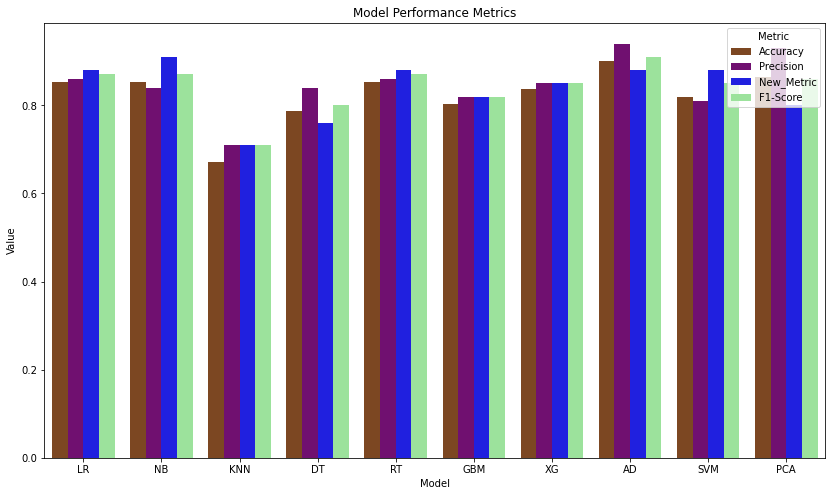

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['LR', 'NB', 'KNN', 'DT', 'RT', 'GBM', 'XG', 'AD', 'SVM', 'PCA'],
    'Accuracy': [0.8524, 0.85245, 0.672, 0.786, 0.852, 0.803, 0.836, 0.901, 0.819, 0.865],
    'Precision': [0.86, 0.84, 0.71, 0.84, 0.86, 0.82, 0.85, 0.94, 0.81, 0.93],
    'Recall': [0.88, 0.91, 0.71, 0.76, 0.88, 0.82, 0.85, 0.88, 0.88, 0.80],
    'F1-Score': [0.87, 0.87, 0.71, 0.80, 0.87, 0.82, 0.85, 0.91, 0.85, 0.86]
}

df = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for seaborn
df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

custom_palette = {
    'Accuracy': '#8B4513',    # SaddleBrown
    'Precision': '#800080',   # Purple
    'F1-Score': 'lightgreen', # Light Green
    'New_Metric': 'blue'      # Blue
}

# Create a bar plot with the custom color palette
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted.replace({'Recall': 'New_Metric'}), palette=custom_palette)
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()

### HYBRID ALGORITHMS(RECALL,PRECISION,ACCURACY,F1SCORE)

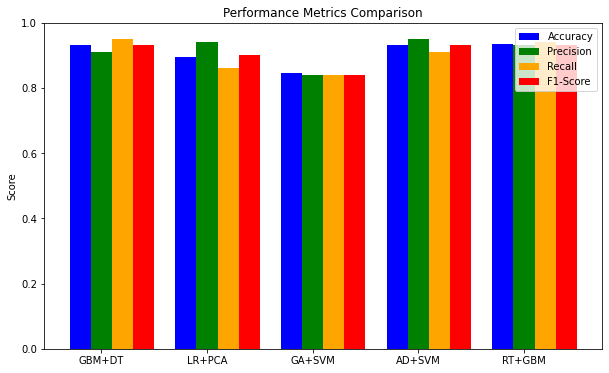

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your results
models = ['GBM+DT', 'LR+PCA', 'GA+SVM', 'AD+SVM', 'RT+GBM']
accuracy = [0.93, 0.895, 0.845, 0.93, 0.935]
precision = [0.91, 0.94, 0.84, 0.95, 0.93]
recall = [0.95, 0.86, 0.84, 0.91, 0.94]
f1_score = [0.93, 0.90, 0.84, 0.93, 0.93]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = np.arange(len(models))

# Accuracy plot
ax.bar(bar_positions - bar_width, accuracy, bar_width, label='Accuracy', color='blue')

# Precision plot
ax.bar(bar_positions, precision, bar_width, label='Precision', color='green')

# Recall plot
ax.bar(bar_positions + bar_width, recall, bar_width, label='Recall', color='orange')

# F1-score plot
ax.bar(bar_positions + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='red')

ax.set_xticks(bar_positions)
ax.set_xticklabels(models)
ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison')
ax.legend()

plt.show()

### TEST AND TRAIN ACCURACIES GRAPHS OF ALGORITHMS AND HYBRID ALGORITHMS

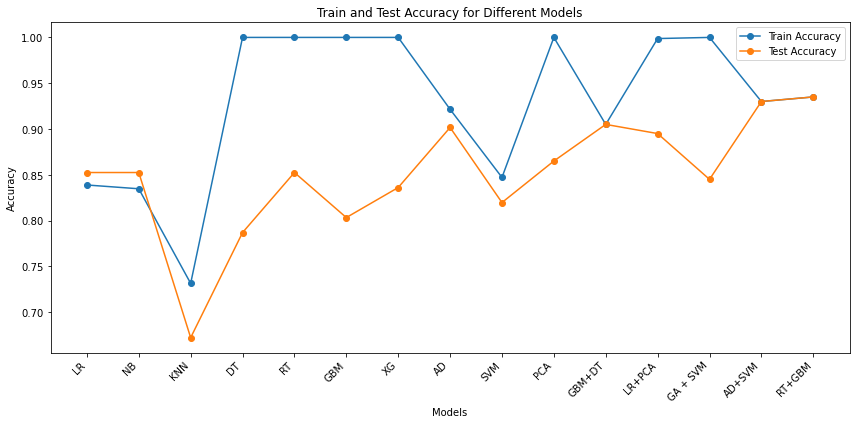

In [74]:
import matplotlib.pyplot as plt

# Data for different models
models = ['LR', 'NB', 'KNN', 'DT', 'RT', 'GBM', 'XG', 'AD', 'SVM', 'PCA', 'GBM+DT', 'LR+PCA', 'GA + SVM', 'AD+SVM', 'RT+GBM']
train_accuracy = [ 0.8388429752066116, 0.8347107438016529, 0.731404958677686, 1.0, 1.0, 1.0, 1.0, 0.9214876033057852, 0.8471074380165289, 1.0, 0.905, 0.99875, 1.0, 0.93, 0.935]
test_accuracy = [0.8524590163934426, 0.8524590163934426, 0.6721311475409836, 0.7868852459016393, 0.8524590163934426, 0.8032786885245902, 0.8360655737704918, 0.9016393442622951, 0.819672131147541, 0.865, 0.905, 0.895, 0.845, 0.93, 0.935]

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(models, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(models, test_accuracy, label='Test Accuracy', marker='o')

plt.title('Train and Test Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()